In [1]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class SelfAttention(nn.Module):
#     def __init__(self, input_dim):
#         super(SelfAttention, self).__init__()
#         self.input_dim = input_dim
#         self.query = nn.Linear(input_dim, input_dim)
#         self.key = nn.Linear(input_dim, input_dim)
#         self.value = nn.Linear(input_dim, input_dim)
#         self.softmax = nn.Softmax(dim=2)
        
#     def forward(self, x):
#         queries = self.query(x)
#         keys = self.key(x)
#         values = self.value(x)
#         scores = torch.bmm(queries, keys.transpose(1, 2)) / (self.input_dim ** 0.5)
#         attention = self.softmax(scores)
#         weighted = torch.bmm(attention, values)
#         return weighted

In [2]:
# model = SelfAttention(768)
# x = torch.rand(10,5,768)

In [7]:
# output = model(x)

In [1]:
import pandas as pd
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import ast 

In [2]:
run_mode='scene'

data=pd.read_csv("/Users/vayungoel/Desktop/passt/final_hear21_embeddings_finetuned_def_model_train_all_blocks.csv")
test_data=pd.read_csv("/Users/vayungoel/Desktop/passt/final_hear21_embeddings_finetuned_def_model_test_all_blocks.csv")

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
def train_ready(data,col_name):
    new_list=[]
    for i in range(len(data)):
        temp_list=[]
        x=data[col_name][i]
        tensor_string = x

# Extract the numbers part of the string
        numbers_string = tensor_string.split("[[")[1].split("]]")[0]

# Parse the string into a Python list
        tensor_list = ast.literal_eval("[" + numbers_string + "]")

# Convert the list to a numpy array
        numpy_array = np.array(tensor_list)
        list_data=list(numpy_array)
        
        new_list.append(list_data)
    return new_list

In [5]:
number_of_classes=len(list(np.unique(np.array(data[run_mode]))))
number_of_classes

10

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def class_distribution(data_list,kk='train'):
    # Get the unique classes
    unique_classes = list(set(data_list))
    
    # Create a dictionary to store the class counts
    class_counts = {cls: 0 for cls in unique_classes}
    
    # Count the occurrences of each class
    for item in data_list:
        class_counts[item] += 1
    
    # Convert the counts to a sorted list of tuples
    sorted_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Print the per-class distribution
    print(f"Per-class distribution for {kk} data:")
    for cls, count in sorted_counts:
        print(f"{cls}: {count}")
    
    # Plot the histogram
    classes = [cls for cls, _ in sorted_counts]
    counts = [count for _, count in sorted_counts]
    
    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.title("Class Distribution Histogram")
    plt.xticks(rotation=90)
    plt.show()
    
    return class_counts

In [7]:
y=data[run_mode].tolist()
print(y)
label_array_train = np.array(y).reshape(-1, 1)
encoder=OneHotEncoder()
y_one_hot_encoded = encoder.fit_transform(label_array_train).toarray()
# print(len(y_one_hot_encoded))
y_one_hot_encoded

['airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport'

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [8]:
y_test=test_data[run_mode].tolist()
label_array_test=np.array(y_test).reshape(-1,1)
encoder=OneHotEncoder()
y_test_one_hot_encoded = encoder.fit_transform(label_array_test).toarray()
y_test_one_hot_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [9]:
class_names = list(np.unique(y_test))

2968
Per-class distribution for test data:
shopping_mall: 297
metro_station: 297
public_square: 297
metro: 297
bus: 297
street_traffic: 297
street_pedestrian: 297
park: 297
tram: 296
airport: 296


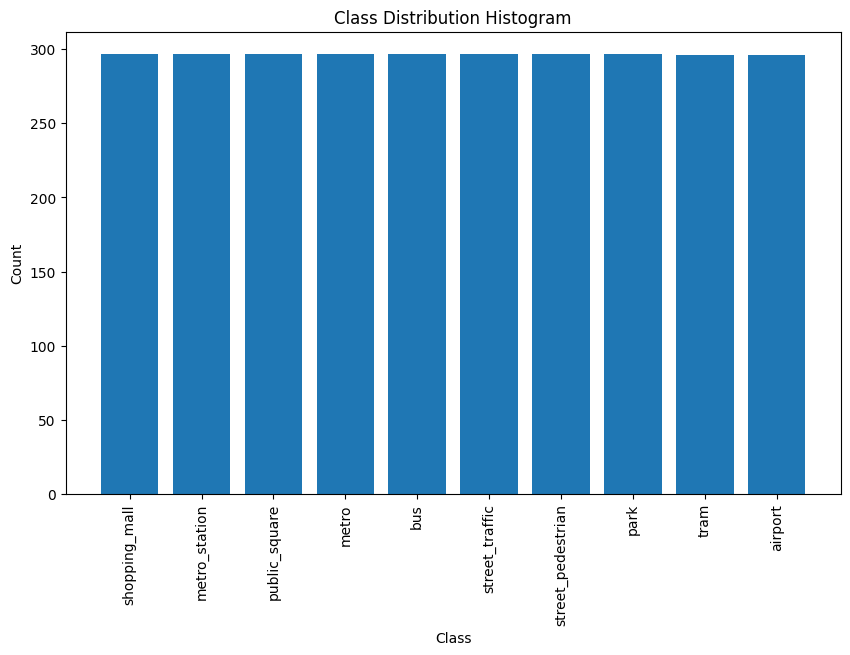

{'tram': 296,
 'shopping_mall': 297,
 'metro_station': 297,
 'public_square': 297,
 'airport': 296,
 'metro': 297,
 'bus': 297,
 'street_traffic': 297,
 'street_pedestrian': 297,
 'park': 297}

In [10]:
reverse=encoder.inverse_transform(y_test_one_hot_encoded)
new_lst=[]
for i in range(len(list(reverse))):
    new_lst.append(reverse[i][0])
print(len(new_lst))
class_distribution(new_lst,kk='test')

In [11]:
class SceneClassifier(nn.Module):
    def __init__(self):
        super(SceneClassifier, self).__init__()
        self.fc2 = nn.Linear(768, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.fc2(x))
        return x


model = SceneClassifier()
total_params = sum(p.numel() for p in model.parameters())
print(total_params)
model.eval()

199434


SceneClassifier(
  (fc2): Linear(in_features=768, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [20]:
final_x = []
for i in range(1,13):    
    col_name=f'embedding{i}'
    model=torch.load(f'scene_maam_audioset/small_model_scene_{i}_opl.pth',map_location=torch.device('cpu'))
    final_X_train=train_ready(data,col_name)
    final_X_train=np.array(final_X_train)
    final_X_train = model(torch.from_numpy(final_X_train).to(torch.float32))
    final_x.append(final_X_train)

In [21]:
train_x_final = []
for i in range(0,12):
    train_x_final.append(final_x[i].detach().numpy())

In [22]:
train_x_final[0][22]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 2.2927985e+00, 4.3469751e-01, 5.7576766e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 6.5693531e+00, 0.0000000e+00, 4.5535808e+00,
       0.0000000e+00, 7.2166753e+00, 1.8558526e+00, 0.0000000e+00,
       0.0000000e+00, 5.0648570e-01, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 3.3300129e-01, 3.0930257e+00, 9.3252081e-01,
       0.0000000e+00, 2.6986599e+00, 0.0000000e+00, 5.4359550e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.2290337e+00,
       0.0000000e+00, 1.0633833e+01, 0.0000000e+00, 0.0000000e+00,
       1.1752006e+00, 2.2159562e+00, 8.8790393e-01, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 4.2242736e-01, 2.9466334e-01,
       2.2619870e+00, 0.0000000e+00, 2.2729666e+00, 0.0000000e+00,
       1.9573038e+00, 2.5544450e+00, 0.0000000e+00, 1.9479010e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [23]:
stacked_array = np.stack(train_x_final, axis=1)

In [24]:
stacked_array.shape

(13962, 12, 256)

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class WeightedAvgEmbedding(nn.Module):
    def __init__(self, embedding_dim, output_dim=10):
        super(WeightedAvgEmbedding, self).__init__()
        self.weights = nn.Parameter(torch.randn(1, 12))  # Initialize with uniform weights
        self.linear = nn.Linear(embedding_dim, output_dim)

    def forward(self, embeddings):
        batch_size, seq_len, embed_dim = embeddings.size()
        weights = F.softmax(self.weights, dim=1)
        # print(weights)
        weights = weights.repeat(batch_size, 1)  # Repeat weights for each sample in the batch
        # print(weights)
        # print(weights.unsqueeze(-1))
        weighted_embeddings = torch.sum(embeddings * weights.unsqueeze(-1), dim=1)
        # print(weighted_embeddings.shape)
        output = F.log_softmax(self.linear(weighted_embeddings), dim=1)
        return output

# Example usage
batch_size = 32
seq_len = 12
embed_dim = 256

# Create random embeddings
embeddings = torch.randn(batch_size, seq_len, embed_dim)

model = WeightedAvgEmbedding(embed_dim)
output = model(embeddings)
print(output.shape)  # (batch_size, 10)

torch.Size([32, 10])


In [26]:
X_train, X_val, y_train, y_val = train_test_split(stacked_array, y_one_hot_encoded, test_size=0.2, random_state=42, stratify=y_one_hot_encoded)

In [27]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(11169, 12, 256)
(2793, 12, 256)
(11169, 10)
(2793, 10)


In [28]:
X_train_tensor=torch.tensor(X_train,dtype=torch.float32)
X_Val_tensor=torch.tensor(X_val,dtype=torch.float32)
y_train_tensor=torch.tensor(y_train,dtype=torch.float32)
y_val_tensor=torch.tensor(y_val,dtype=torch.float32)

In [29]:
X_train_tensor.shape

torch.Size([11169, 12, 256])

In [41]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

Epoch 0: 100%|██████████| 174/174 [00:00<00:00, 400.69batch/s, acc=0.344, loss=2.04]


Epoch 0 validation: Cross-entropy=2.03, Accuracy=37.0%


Epoch 30: 100%|██████████| 174/174 [00:00<00:00, 462.26batch/s, acc=0.781, loss=0.734]


Epoch 30 validation: Cross-entropy=0.70, Accuracy=75.2%


Epoch 60: 100%|██████████| 174/174 [00:00<00:00, 492.45batch/s, acc=0.75, loss=0.655] 


Epoch 60 validation: Cross-entropy=0.58, Accuracy=78.1%


Epoch 90: 100%|██████████| 174/174 [00:00<00:00, 483.22batch/s, acc=0.781, loss=0.627]


Epoch 90 validation: Cross-entropy=0.54, Accuracy=79.3%


Epoch 120: 100%|██████████| 174/174 [00:00<00:00, 461.72batch/s, acc=0.766, loss=0.608]


Epoch 120 validation: Cross-entropy=0.51, Accuracy=80.2%


Epoch 150: 100%|██████████| 174/174 [00:00<00:00, 458.25batch/s, acc=0.766, loss=0.594]


Epoch 150 validation: Cross-entropy=0.50, Accuracy=81.0%


Epoch 180: 100%|██████████| 174/174 [00:00<00:00, 439.50batch/s, acc=0.766, loss=0.585]


Epoch 180 validation: Cross-entropy=0.49, Accuracy=81.6%


Epoch 210: 100%|██████████| 174/174 [00:00<00:00, 411.96batch/s, acc=0.797, loss=0.579]


Epoch 210 validation: Cross-entropy=0.48, Accuracy=82.0%


Epoch 240: 100%|██████████| 174/174 [00:00<00:00, 490.32batch/s, acc=0.797, loss=0.575]


Epoch 240 validation: Cross-entropy=0.47, Accuracy=82.3%


Epoch 270: 100%|██████████| 174/174 [00:00<00:00, 458.21batch/s, acc=0.797, loss=0.572]


Epoch 270 validation: Cross-entropy=0.47, Accuracy=82.5%


Epoch 300: 100%|██████████| 174/174 [00:00<00:00, 459.72batch/s, acc=0.797, loss=0.57] 


Epoch 300 validation: Cross-entropy=0.46, Accuracy=82.5%


Epoch 330: 100%|██████████| 174/174 [00:00<00:00, 483.25batch/s, acc=0.797, loss=0.569]


Epoch 330 validation: Cross-entropy=0.46, Accuracy=82.5%


Epoch 360: 100%|██████████| 174/174 [00:00<00:00, 490.34batch/s, acc=0.797, loss=0.568]


Epoch 360 validation: Cross-entropy=0.45, Accuracy=82.5%


Epoch 390: 100%|██████████| 174/174 [00:00<00:00, 500.12batch/s, acc=0.812, loss=0.567]


Epoch 390 validation: Cross-entropy=0.45, Accuracy=82.6%


Epoch 420: 100%|██████████| 174/174 [00:00<00:00, 426.90batch/s, acc=0.812, loss=0.567]


Epoch 420 validation: Cross-entropy=0.45, Accuracy=82.6%


Epoch 450: 100%|██████████| 174/174 [00:00<00:00, 466.16batch/s, acc=0.812, loss=0.566]


Epoch 450 validation: Cross-entropy=0.44, Accuracy=82.9%


Epoch 480: 100%|██████████| 174/174 [00:00<00:00, 460.10batch/s, acc=0.812, loss=0.566]


Epoch 480 validation: Cross-entropy=0.44, Accuracy=83.0%


Epoch 510: 100%|██████████| 174/174 [00:00<00:00, 463.51batch/s, acc=0.812, loss=0.565]


Epoch 510 validation: Cross-entropy=0.44, Accuracy=83.0%


Epoch 540: 100%|██████████| 174/174 [00:00<00:00, 457.34batch/s, acc=0.812, loss=0.565]


Epoch 540 validation: Cross-entropy=0.44, Accuracy=82.9%


Epoch 570: 100%|██████████| 174/174 [00:00<00:00, 444.06batch/s, acc=0.812, loss=0.564]


Epoch 570 validation: Cross-entropy=0.43, Accuracy=83.0%


Epoch 599: 100%|██████████| 174/174 [00:00<00:00, 438.25batch/s, acc=0.812, loss=0.564]


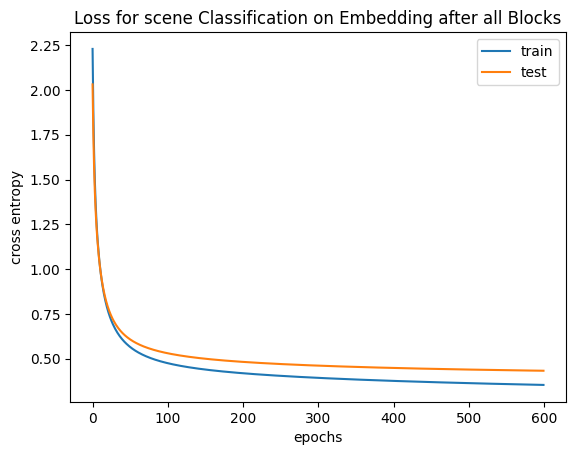

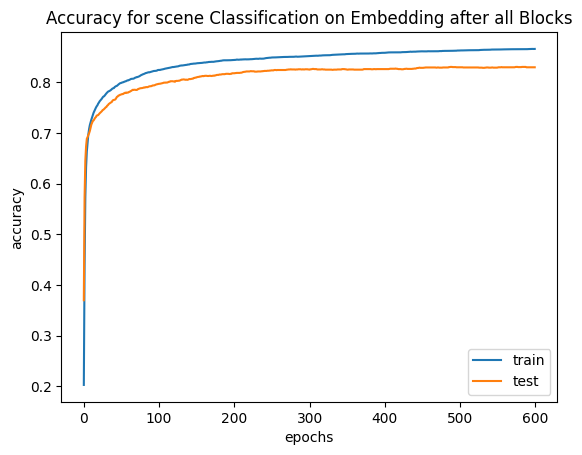

In [42]:
import tqdm
import copy
n_epochs = 600
batch_size = 64
batches_per_epoch = len(X_train) // batch_size

# # Move model to device (if applicable)
# model.to(device)

best_loss =  np.inf  # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []
best_acc = 0
# training loop
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train_tensor[start:start + batch_size].to(device)
            y_batch = y_train_tensor[start:start + batch_size].to(device)

            # forward pass
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)

            # backward pass
            optimizer.zero_grad()
            loss.backward()

            # update weights
            optimizer.step()

            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(loss=float(loss), acc=float(acc))

    # set model in evaluation mode and run through the test set
    model.eval()
    with torch.no_grad():  # Disable gradient calculation for efficiency
        X_test_batch = X_Val_tensor.to(device)  # Move test data to device
        y_val_batch=y_val_tensor.to(device)
        y_pred = model(X_test_batch).to(device)
        ce = criterion(y_pred, y_val_batch)
        acc = (torch.argmax(y_pred, 1) == torch.argmax(y_val_batch, 1)).float().mean()

    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)

    if ce <= best_loss  and acc >  best_acc:
        best_loss=ce
        best_weights = copy.deepcopy(model.state_dict())
        best_acc = acc

    if(epoch % 30 == 0):
        print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc * 100:.1f}%")

model.load_state_dict(best_weights)
# model.save("scene_classification.pth")

plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.title(f"Loss for {run_mode} Classification on Embedding after all Blocks")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.title(f"Accuracy for {run_mode} Classification on Embedding after all Blocks")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [43]:
model.load_state_dict(best_weights)

<All keys matched successfully>

In [44]:
torch.save(model, f'scene_maam_audioset/small_model_{run_mode}_all_blocks_weighted_avg_opl.pth')

In [45]:
final_x_test = []
for i in range(1,13):    
    col_name=f'embedding{i}'
    model=torch.load(f'scene_maam_audioset/small_model_scene_{i}_opl.pth',map_location=torch.device('cpu'))
    final_X_test=train_ready(test_data,col_name)
    final_X_test=np.array(final_X_test)
    final_X_test = model(torch.from_numpy(final_X_test).to(torch.float32))
    final_x_test.append(final_X_test.detach().numpy())

In [46]:
final_x_test[8].shape

(2968, 256)

In [47]:
X_test = np.stack(final_x_test, axis=1)

In [48]:
X_test.shape

(2968, 12, 256)

In [49]:
model=torch.load(f'scene_maam_audioset/small_model_scene_all_blocks_weighted_avg_opl.pth',map_location=torch.device('cpu'))

In [50]:
X_test_tensors = [torch.tensor(feature, dtype=torch.float32, device=device) for feature in X_test]

# Run inference and get predictions
y_pred = []
with torch.no_grad():
    for feature in X_test_tensors:
        output = model(feature.unsqueeze(0))
        _, predicted = torch.max(output.data, 1)
        predicted_class = class_names[predicted.item()]
        y_pred.append(predicted_class)


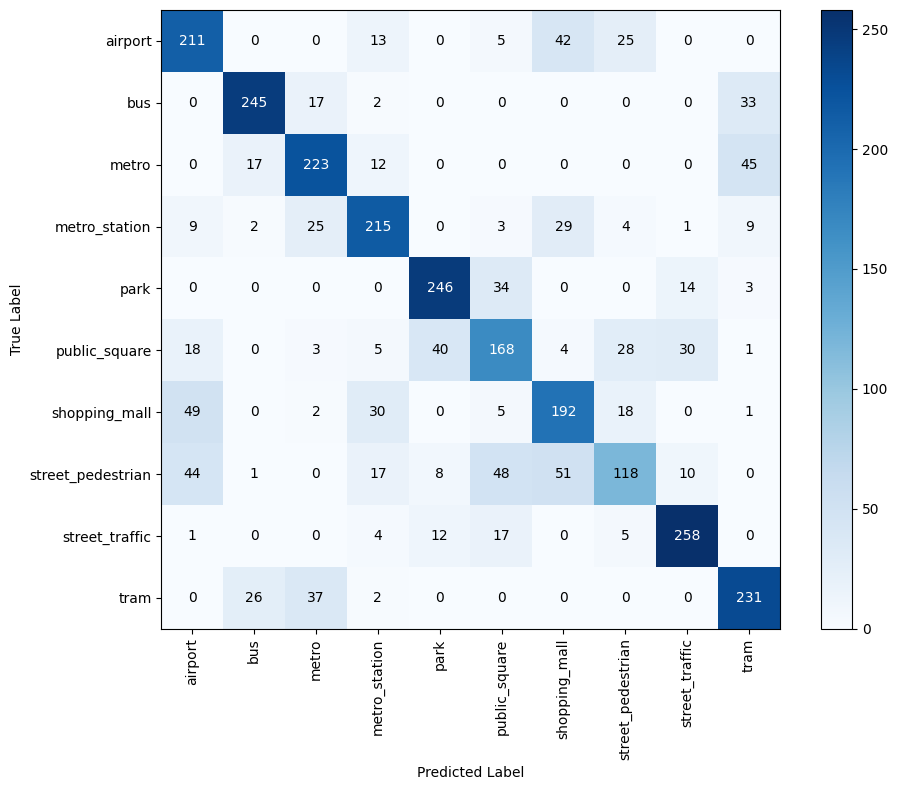

Accuracy: 0.7099


In [51]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=class_names)
accuracy = accuracy_score(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

# Add numerical values to the confusion matrix
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="white" if conf_matrix[i, j] > (conf_matrix.max() / 2) else "black")

plt.show()

# Print the accuracy
print(f"Accuracy: {accuracy:.4f}")

In [55]:
F.softmax(model.weights)

/var/folders/1t/nq9sr55n1f30gyyt8gxnqxb80000gn/T/ipykernel_12193/578636076.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(model.weights)


tensor([[0.0072, 0.0737, 0.0019, 0.0015, 0.0020, 0.0079, 0.0007, 0.0805, 0.1585,
         0.3312, 0.1827, 0.1522]], grad_fn=<SoftmaxBackward0>)